In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/clean/cars.csv")
print(df.shape)
df.head(5)

(37705, 12)


,make,model,transmission,color,mileage,year,fuel,engine_capacity,body_type,has_warranty,drivetrain,price
0,subaru,outback,automatic,silver,190000,2010,gasoline,2.5,universal,False,all,10900.00
1,subaru,outback,automatic,blue,290000,2002,gasoline,3.0,universal,False,all,5000.00
2,subaru,forester,automatic,red,402000,2001,gasoline,2.5,suv,False,all,2800.00
3,subaru,impreza,mechanical,blue,10000,1999,gasoline,3.0,sedan,False,all,9999.00
4,subaru,legacy,automatic,black,280000,2001,gasoline,2.5,universal,False,all,2134.11


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37705 entries, 0 to 37704
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   make             37705 non-null  object 
 1   model            37705 non-null  object 
 2   transmission     37705 non-null  object 
 3   color            37705 non-null  object 
 4   mileage          37705 non-null  int64  
 5   year             37705 non-null  int64  
 6   fuel             37705 non-null  object 
 7   engine_capacity  37705 non-null  float64
 8   body_type        37705 non-null  object 
 9   has_warranty     37705 non-null  bool   
 10  drivetrain       37705 non-null  object 
 11  price            37705 non-null  float64
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 3.2+ MB


In [4]:
df.describe()

,mileage,year,engine_capacity,price
count,37705.000000,37705.000000,37705.000000,37705.000000
mean,251599.240578,2002.813181,2.060800,6471.721217
std,133616.887562,7.896886,0.674306,6063.672740
min,1.000000,1942.000000,0.200000,1.000000
25%,160000.000000,1998.000000,1.600000,2150.000000
50%,250000.000000,2003.000000,2.000000,4750.000000
75%,325000.000000,2009.000000,2.300000,8800.000000
max,1000000.000000,2019.000000,8.000000,50000.000000


In [5]:
df.isnull().sum()

make               0
model              0
transmission       0
color              0
mileage            0
year               0
fuel               0
engine_capacity    0
body_type          0
has_warranty       0
drivetrain         0
price              0
dtype: int64

In [6]:
current_year = 2025
df['age'] = current_year - df['year']

print("\nAge vs Price Analysis:")
print(df[['year', 'age', 'price']].sort_values('year'))

numerical_cols = ['price', 'mileage', 'year', 'engine_capacity', 'age']
correlation = df[numerical_cols].corr()
print("\nCorrelation Matrix:")
print(correlation)


Age vs Price Analysis:
       year  age     price
23016  1942   83  22011.76
23010  1950   75   2000.00
4447   1956   69   1000.00
4435   1959   66    800.00
3361   1960   65   8000.00
...     ...  ...       ...
17406  2019    6  10700.00
31939  2019    6  12000.00
31876  2019    6  11500.00
24560  2019    6  12900.00
392    2019    6  12804.70

[37705 rows x 3 columns]

Correlation Matrix:
                    price   mileage      year  engine_capacity       age
price            1.000000 -0.394443  0.698364         0.332391 -0.698364
mileage         -0.394443  1.000000 -0.470353         0.096155  0.470353
year             0.698364 -0.470353  1.000000         0.015813 -1.000000
engine_capacity  0.332391  0.096155  0.015813         1.000000 -0.015813
age             -0.698364  0.470353 -1.000000        -0.015813  1.000000


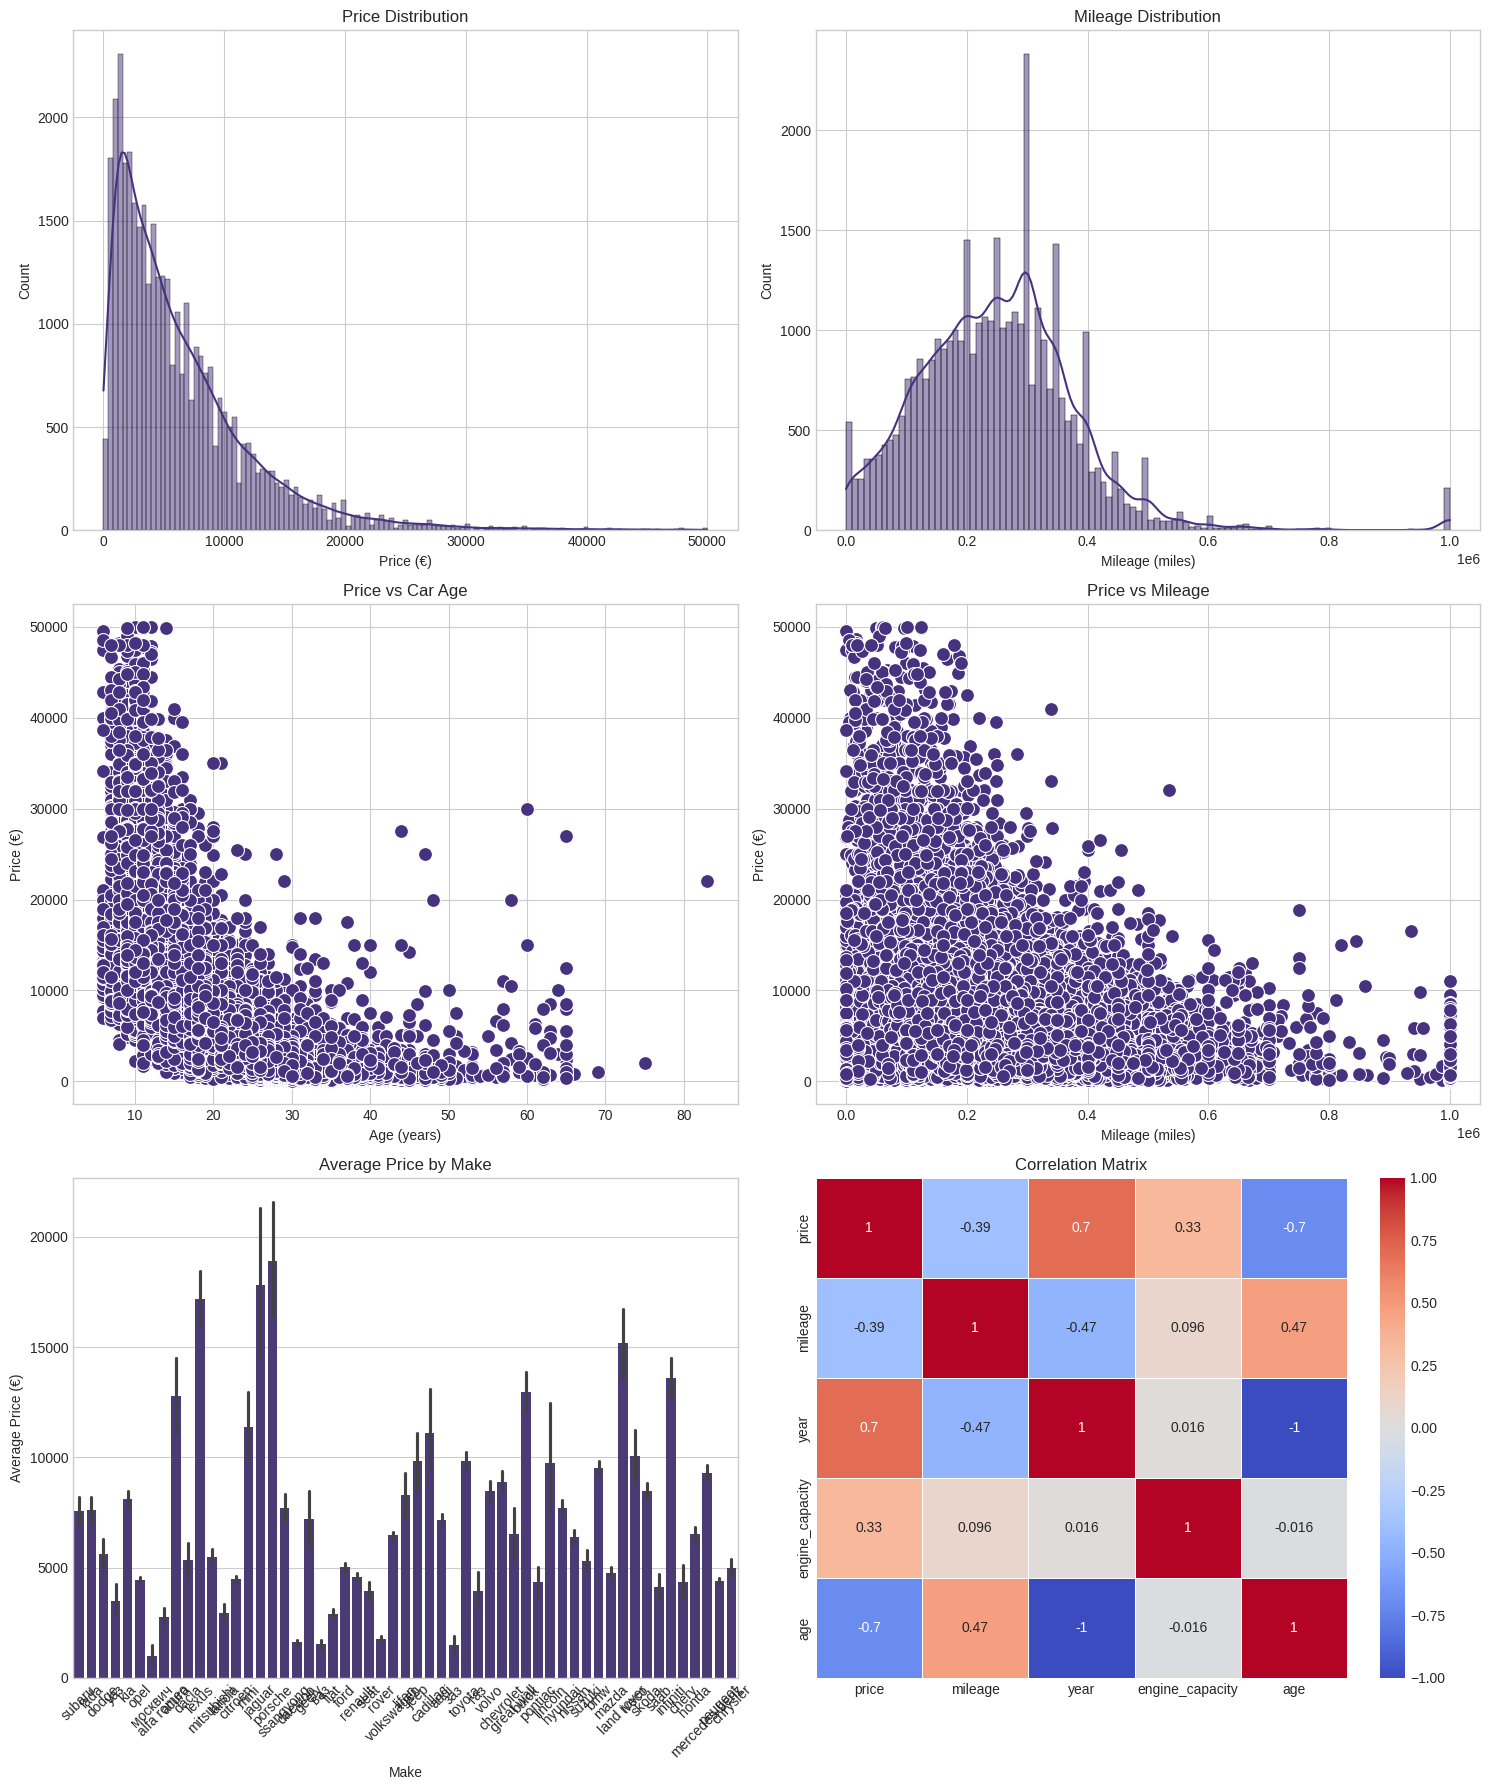

In [20]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')

fig, axes = plt.subplots(3, 2, figsize=(15, 18))

# Price Distribution
sns.histplot(data=df, x='price', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Price Distribution')
axes[0, 0].set_xlabel('Price (€)')

# Mileage Distribution
sns.histplot(data=df, x='mileage', kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Mileage Distribution')
axes[0, 1].set_xlabel('Mileage (miles)')

# Price by Car Age
sns.scatterplot(data=df, x='age', y='price', s=100, ax=axes[1, 0])
axes[1, 0].set_title('Price vs Car Age')
axes[1, 0].set_xlabel('Age (years)')
axes[1, 0].set_ylabel('Price (€)')

# Price by Mileage
sns.scatterplot(data=df, x='mileage', y='price', s=100, ax=axes[1, 1])
axes[1, 1].set_title('Price vs Mileage')
axes[1, 1].set_xlabel('Mileage (miles)')
axes[1, 1].set_ylabel('Price (€)')

# Price by Make
sns.barplot(data=df, x='make', y='price', ax=axes[2, 0])
axes[2, 0].set_title('Average Price by Make')
axes[2, 0].set_xlabel('Make')
axes[2, 0].set_ylabel('Average Price (€)')
axes[2, 0].tick_params(axis='x', rotation=45)

# Correlation Heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[2, 1])
axes[2, 1].set_title('Correlation Matrix')

plt.tight_layout()
plt.show()

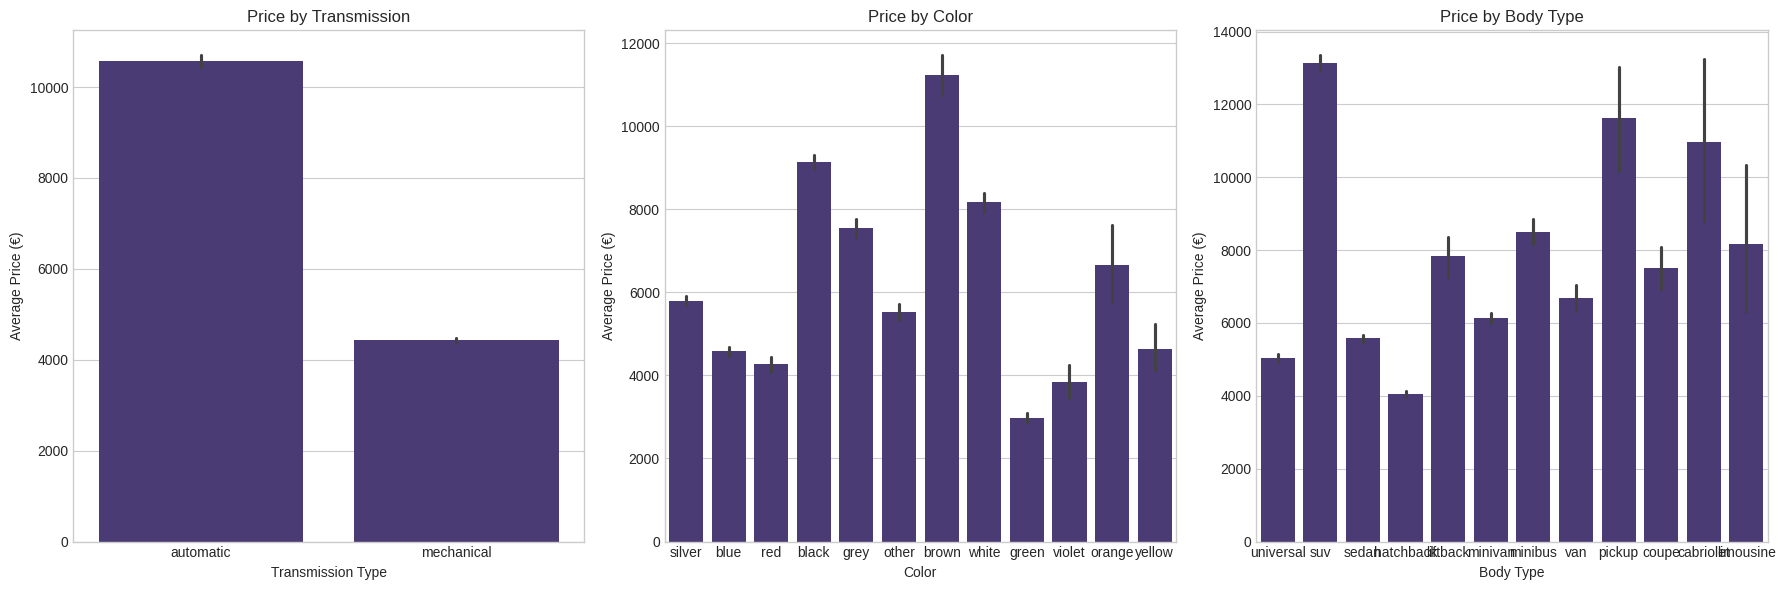

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Price by Transmission
sns.barplot(data=df, x='transmission', y='price', ax=axes[0])
axes[0].set_title('Price by Transmission')
axes[0].set_xlabel('Transmission Type')
axes[0].set_ylabel('Average Price (€)')

# Price by Color
sns.barplot(data=df, x='color', y='price', ax=axes[1])
axes[1].set_title('Price by Color')
axes[1].set_xlabel('Color')
axes[1].set_ylabel('Average Price (€)')

# Price by Body Type
sns.barplot(data=df, x='body_type', y='price', ax=axes[2])
axes[2].set_title('Price by Body Type')
axes[2].set_xlabel('Body Type')
axes[2].set_ylabel('Average Price (€)')

plt.tight_layout()
plt.show()


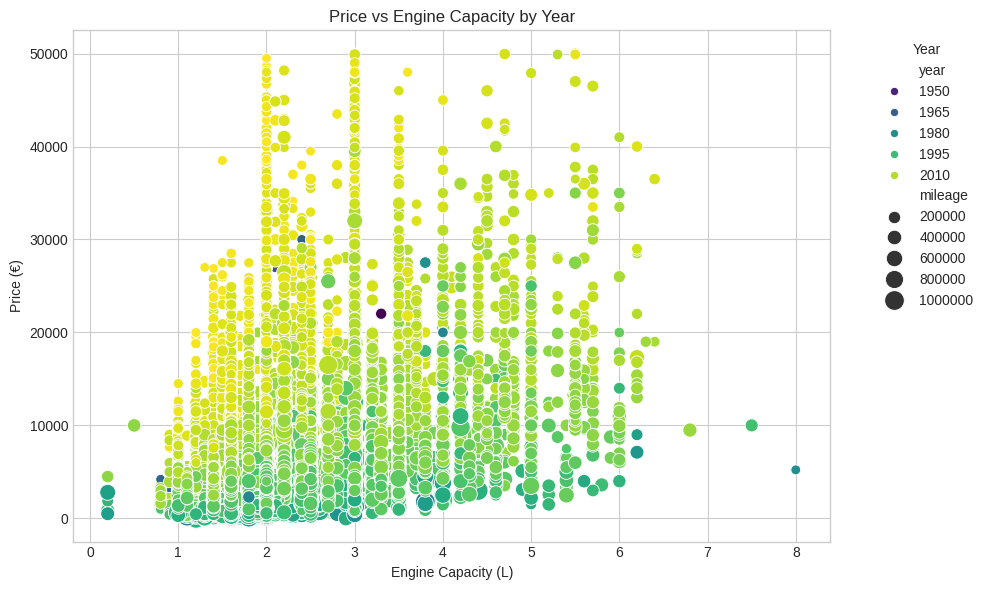

In [16]:
# Engine Capacity vs Price with Year as Hue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='engine_capacity', y='price', hue='year', size='mileage', 
                sizes=(50, 200), palette='viridis')
plt.title('Price vs Engine Capacity by Year')
plt.xlabel('Engine Capacity (L)')
plt.ylabel('Price (€)')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [17]:
df['miles_per_year'] = df['mileage'] / df['age']

# Price per mile
df['price_per_mile'] = df['price'] / df['mileage']

# Price per year of age
df['price_per_year'] = df['price'] / df['age']

print("\nEngineered Features:")
display(df[['make', 'miles_per_year', 'price_per_mile', 'price_per_year']])



Engineered Features:


,make,miles_per_year,price_per_mile,price_per_year
0,subaru,12666.666667,0.057368,726.666667
1,subaru,12608.695652,0.017241,217.391304
2,subaru,16750.000000,0.006965,116.666667
3,subaru,384.615385,0.999900,384.576923
4,subaru,11666.666667,0.007622,88.921250
...,...,...,...,...
37700,chrysler,11600.000000,0.009483,110.000000
37701,chrysler,15285.714286,0.014953,228.571429
37702,chrysler,31118.280000,0.005527,172.000000
37703,chrysler,833.333333,0.200000,166.666667


In [24]:
df.head(10)

,make,model,transmission,color,mileage,year,fuel,engine_capacity,body_type,has_warranty,drivetrain,price,age,miles_per_year,price_per_mile,price_per_year
0,subaru,outback,automatic,silver,190000,2010,gasoline,2.5,universal,False,all,10900.00,15,12666.666667,0.057368,726.666667
1,subaru,outback,automatic,blue,290000,2002,gasoline,3.0,universal,False,all,5000.00,23,12608.695652,0.017241,217.391304
2,subaru,forester,automatic,red,402000,2001,gasoline,2.5,suv,False,all,2800.00,24,16750.000000,0.006965,116.666667
3,subaru,impreza,mechanical,blue,10000,1999,gasoline,3.0,sedan,False,all,9999.00,26,384.615385,0.999900,384.576923
4,subaru,legacy,automatic,black,280000,2001,gasoline,2.5,universal,False,all,2134.11,24,11666.666667,0.007622,88.921250
5,subaru,outback,automatic,silver,132449,2011,gasoline,2.5,universal,False,all,14700.00,14,9460.642857,0.110986,1050.000000
6,subaru,forester,automatic,black,318280,1998,gasoline,2.5,universal,False,all,3000.00,27,11788.148148,0.009426,111.111111
7,subaru,legacy,automatic,silver,350000,2004,gasoline,2.5,sedan,False,all,4500.00,21,16666.666667,0.012857,214.285714
8,subaru,outback,automatic,grey,179000,2010,gasoline,2.5,universal,False,all,12900.00,15,11933.333333,0.072067,860.000000
9,subaru,forester,automatic,silver,571317,1999,gasoline,2.5,universal,False,all,4200.00,26,21973.730769,0.007351,161.538462


In [19]:
df.to_csv("../data/interim/cars.csv", index=False)